In [1]:
import pandas as pd

In [2]:
rj = pd.read_csv("RJ.BARRETT.csv")

In [4]:
rj

,Unnamed: 0,Status,Mins,oMins,dMins,oPOSS,dPOSS,ORTG,DRTG,NETRTG,...,ASTrate,dASTrate,TOrate,dTOrate,BLKrate,oBLKrate,ORB.,DRB.,TimePerPoss,dTimePerPoss
0,1,RJ.BARRETT On,620.584,274.466,346.118,1155,1157,115.758,92.567,23.191,...,0.52,0.486,0.177,0.200,0.097,0.048,0.373,0.717,14.258,17.949
1,2,RJ.BARRETT Off,65.282,33.867,31.419,128,117,101.562,86.325,15.238,...,0.60,0.641,0.172,0.205,0.121,0.087,0.233,0.712,15.875,16.112


In [6]:
cam = pd.read_csv("CAM.REDDISH.csv")

In [7]:
cam

,Unnamed: 0,Status,Mins,oMins,dMins,oPOSS,dPOSS,ORTG,DRTG,NETRTG,...,ASTrate,dASTrate,TOrate,dTOrate,BLKrate,oBLKrate,ORB.,DRB.,TimePerPoss,dTimePerPoss
0,1,CAM.REDDISH On,620.584,274.466,346.118,1155,1157,115.758,92.567,23.191,...,0.520,0.486,0.177,0.200,0.097,0.048,0.373,0.717,14.258,17.949
1,2,CAM.REDDISH Off,268.531,121.900,146.633,501,499,120.758,87.575,33.183,...,0.538,0.554,0.134,0.226,0.137,0.056,0.386,0.664,14.599,17.631


In [8]:
zion = pd.read_csv("ZION.WILLIAMSON.csv")

In [9]:
zion

,Unnamed: 0,Status,Mins,oMins,dMins,oPOSS,dPOSS,ORTG,DRTG,NETRTG,...,ASTrate,dASTrate,TOrate,dTOrate,BLKrate,oBLKrate,ORB.,DRB.,TimePerPoss,dTimePerPoss
0,1,ZION.WILLIAMSON On,620.584,274.466,346.118,1155,1157,115.758,92.567,23.191,...,0.520,0.486,0.177,0.200,0.097,0.048,0.373,0.717,14.258,17.949
1,2,ZION.WILLIAMSON Off,340.850,157.933,182.918,647,641,106.182,95.008,11.175,...,0.525,0.473,0.189,0.173,0.105,0.057,0.313,0.696,14.646,17.122


In [13]:
zion.columns

Index(['Unnamed: 0', 'Status', 'Mins', 'oMins', 'dMins', 'oPOSS', 'dPOSS',
       'ORTG', 'DRTG', 'NETRTG', 'PTS', 'dPTS', 'FGA', 'dFGA', 'FGM', 'dFGM',
       'TPA', 'dTPA', 'TPM', 'dTPM', 'FTA', 'dFTA', 'FTM', 'dFTM', 'RIMA',
       'dRIMA', 'RIMM', 'dRIMM', 'ORB', 'dORB', 'DRB', 'dDRB', 'BLK', 'dBLK',
       'TO', 'dTO', 'AST', 'dAST', 'ePOSS', 'FG.', 'dFG.', 'TPP', 'dTPP',
       'FTP', 'dFTP', 'eFG.', 'deFG.', 'TS.', 'dTS.', 'RIM.', 'dRIM.', 'MID.',
       'dMID.', 'TPrate', 'dTPrate', 'RIMrate', 'dRIMrate', 'MIDrate',
       'dMIDrate', 'FTrate', 'dFTrate', 'ASTrate', 'dASTrate', 'TOrate',
       'dTOrate', 'BLKrate', 'oBLKrate', 'ORB.', 'DRB.', 'TimePerPoss',
       'dTimePerPoss'],
      dtype='object')

In [32]:
def PACE(df):
    df["PACE"] = 5 * ((df["oPOSS"] + df["dPOSS"])/ df["Mins"])
    return df

In [33]:
zion_four_factors = PACE(zion)

In [34]:
zion_four_factors

,Unnamed: 0,Status,Mins,oMins,dMins,oPOSS,dPOSS,ORTG,DRTG,NETRTG,...,dASTrate,TOrate,dTOrate,BLKrate,oBLKrate,ORB.,DRB.,TimePerPoss,dTimePerPoss,PACE
0,1,ZION.WILLIAMSON On,620.584,274.466,346.118,1155,1157,115.758,92.567,23.191,...,0.486,0.177,0.200,0.097,0.048,0.373,0.717,14.258,17.949,18.627615
1,2,ZION.WILLIAMSON Off,340.850,157.933,182.918,647,641,106.182,95.008,11.175,...,0.473,0.189,0.173,0.105,0.057,0.313,0.696,14.646,17.122,18.893942


In [35]:
def select_four_factors(df):
    four_factor = df[["Status","PACE","eFG.","TOrate","FTrate","ORTG","DRTG","NETRTG"]]
    return four_factor

In [36]:
zion_four_factors = select_four_factors(zion_four_factors)

In [37]:
zion_four_factors

,Status,PACE,eFG.,TOrate,FTrate,ORTG,DRTG,NETRTG
0,ZION.WILLIAMSON On,18.627615,0.566,0.177,0.321,115.758,92.567,23.191
1,ZION.WILLIAMSON Off,18.893942,0.530,0.189,0.360,106.182,95.008,11.175


In [38]:
rj_four_factors = PACE(rj)
rj_four_factors = select_four_factors(rj_four_factors)

In [39]:
rj_four_factors

,Status,PACE,eFG.,TOrate,FTrate,ORTG,DRTG,NETRTG
0,RJ.BARRETT On,18.627615,0.566,0.177,0.321,115.758,92.567,23.191
1,RJ.BARRETT Off,18.764744,0.500,0.172,0.356,101.562,86.325,15.238


In [40]:
cam_four_factors = PACE(cam)
cam_four_factors = select_four_factors(cam_four_factors)

In [41]:
cam_four_factors

,Status,PACE,eFG.,TOrate,FTrate,ORTG,DRTG,NETRTG
0,CAM.REDDISH On,18.627615,0.566,0.177,0.321,115.758,92.567,23.191
1,CAM.REDDISH Off,18.619824,0.552,0.134,0.310,120.758,87.575,33.183


## Graph

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
sns.set(style="darkgrid")

In [46]:
zion_impact = sns.load_dataset("zion_four_factors")

ValueError: 'zion_four_factors' is not one of the example datasets.

<AxesSubplot:xlabel='Status'>

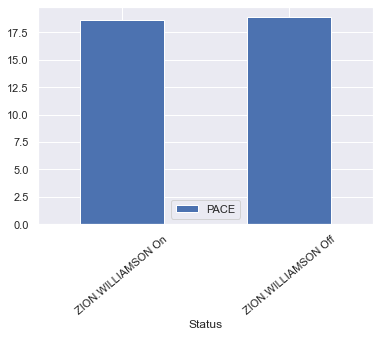

In [50]:
zion_four_factors.plot.bar(x = 'Status', y = ['PACE'], rot = 40)